In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

/home/apk/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
eeg=h5py.File("ME_10_P_2019.02.21_16.20.56.hdf5",mode='r')
keys2= list(eeg.keys())
print keys2
keys1= list(eeg[keys2[0]].keys())
print keys1
#print eeg[keys2[0]][keys1[0]]
#eeg["RawData"]['Samples']
print list(eeg['RawData'].keys())
print eeg['RawData']['Samples']
sampletime = np.array(eeg['AsynchronData']["Time"])
time=sampletime/256.0
sampletime1=np.delete(sampletime, len(sampletime)-1)
sampletime1=np.delete(sampletime1, 0)
print sampletime1

[u'AsynchronData', u'RawData', u'SavedFeatues', u'Version']
[u'AsynchronSignalTypes', u'Time', u'TypeID', u'Value']
[u'AcquisitionTaskDescription', u'DAQDeviceCapabilities', u'DAQDeviceDescription', u'Samples', u'SessionDescription', u'SubjectDescription']
<HDF5 dataset "Samples": shape (25445, 64), type "<f4">
[13656 16151 18276 20771 22921]


In [3]:
samples=(np.array(eeg['RawData']['Samples']))
for i in range (len(samples), (len(samples)/250+1)*250):
    samples=np.vstack((samples, np.zeros(64)))
    
samples=samples.T

In [4]:
import scipy.signal as signal
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

In [5]:
import pywt
w = pywt.Wavelet('db3')
import scipy.stats as st

In [6]:
def entropy_1st(sig):
    coeffs = pywt.wavedec(sig, w, level=4)
    return st.entropy(abs(coeffs[1]))

/home/apk/anaconda2/lib/python2.7/site-packages/scipy/signal/spectral.py:1773: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))


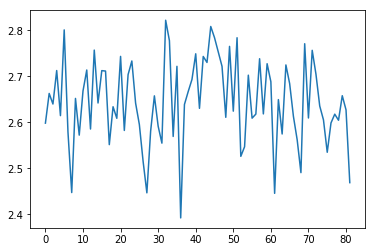

In [7]:
power=[]
mav=[]
var=[]
std=[]
et1st=[]
fs=256
order=3

for i in range (20*250, len(samples[0]), 250):
    b, a = butter_bandpass(0.1, 100, fs, order=order)
    samples[0][i:i+250]=(signal.filtfilt(b, a, samples[0][i:i+250], padlen=0))
    freqs, psd = signal.welch(samples[0][i:i+250])
    power.append(np.sqrt(max(psd)))
    et1st.append(entropy_1st(samples[0][i:i+250]))
    mav.append(np.mean(np.abs(samples[0][i:i+250])))
    sigsq=np.mean((samples[0][i:i+250]-np.mean(samples[0][i:i+250]))**2)
    var.append(sigsq)
    std.append(np.sqrt(sigsq))
plt.plot(np.arange(82), et1st)

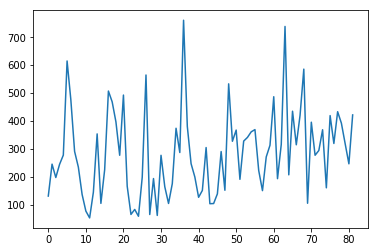

In [8]:
features=[]
for i in [1 ,10, 20, 30, 40]:
    ftl=[]
    power=[]
    mav=[]
    var=[]
    std=[]
    et1st=[]
    fs=256
    order=3

    for i in range (20*250, len(samples[0]), 250):
        b, a = butter_bandpass(0.1, 100, fs, order=order)
        samples[0][i:i+250]=(signal.filtfilt(b, a, samples[0][i:i+250], padlen=0))
        freqs, psd = signal.welch(samples[0][i:i+250])
        power.append(np.sqrt(max(psd)))
        et1st.append(entropy_1st(samples[0][i:i+250]))
        mav.append(np.mean(np.abs(samples[0][i:i+250])))
        sigsq=np.mean((samples[0][i:i+250]-np.mean(samples[0][i:i+250]))**2)
        var.append(sigsq)
        std.append(np.sqrt(sigsq))
        
    ftl.append(power)
    ftl.append(et1st)
    ftl.append(mav)
    ftl.append(var)
    ftl.append(std)
    features.append(ftl)
    
features=np.array(features)
plt.plot(np.arange(82),features[1][0])